In [1]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Enable interactive plotting - This must be the first matplotlib command
%matplotlib widget

# Add src to path
notebook_dir = Path.cwd()
src_dir = notebook_dir.parent / 'src'
if str(src_dir) not in sys.path:
    sys.path.append(str(src_dir))

from core.profile import Profile
from visualization.interactive import InteractivePlot

# Interactive SubOcean Profile Visualization
Example of interactive plotting features for SubOcean profiles

In [2]:
# Load real profile data
data_path = Path('../data/Level0/SubOceanExperiment2024-11-27T12-58-44.txt')
log_path = Path('../data/Level0/SubOceanExperiment2024-11-27T12-58-44.log')

profile = Profile(data_path, log_path)
data, metadata = profile.load()

AttributeError: 'InteractivePlot' object has no attribute 'callbacks'

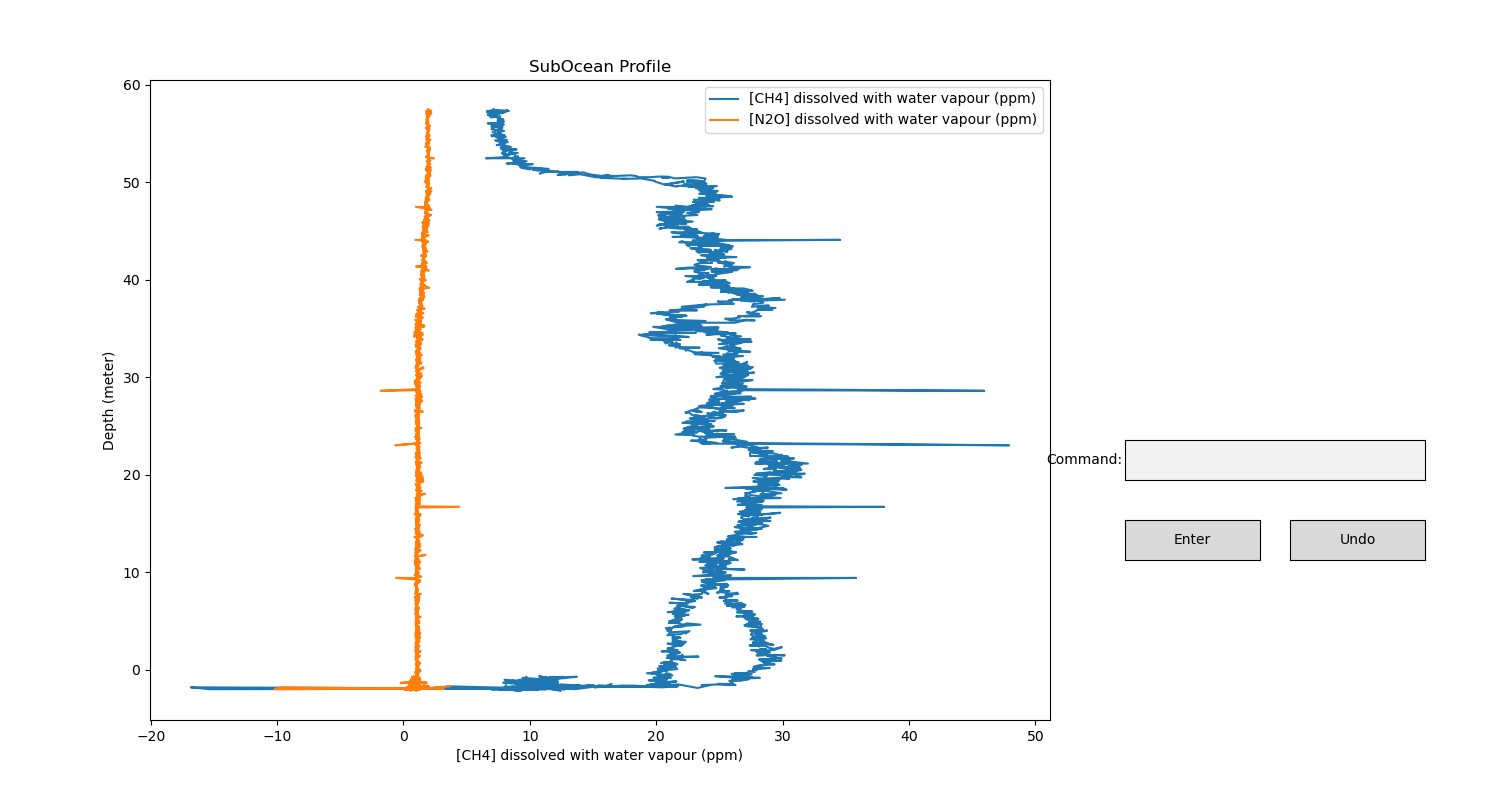

In [3]:
# Create interactive plot
plotter = InteractivePlot(data)

# Create depth profile with CH4 and N2O
fig = plotter.create_interactive_profile(
    x_columns=[
        '[CH4] dissolved with water vapour (ppm)',
        '[N2O] dissolved with water vapour (ppm)'
    ],
    title='SubOcean Profile'
)

# Add filter callback for Error Standard
def filter_by_error(threshold):
    return data[data['Error Standard'] <= threshold]

plotter.add_filter_callback('Error Standard', filter_by_error)

## Interactive Features:
1. Use depth slider to zoom in/out
2. Click reset button to restore view
3. Click on points to see data details
4. Use pan/zoom tools from matplotlib toolbar